In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import datetime 

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


In [114]:
origin_data = pd.read_csv('all_features.csv')
origin_data['cal_date'] = origin_data['cal_date'].apply(lambda x : str(x))
origin_data = origin_data[['ppi_yoy','ppi_mom','ppi_accu','nt_val','town_val','cnt_val','m0','m1','m2','gdp','pi','si','ti','settle','vol','amount','oi','close']]

# # 最小值相差28%，最大值相差29%
# mean = origin_data.close.describe()['mean']
# mode = float(origin_data['close'].mode())
# origin_data['is_valid'] = origin_data['close'].apply(lambda x : 0 if (abs(x-mode)/mode>0.15) else 1)


train_data = origin_data[0:1000]
# train_data = train_data[train_data['is_valid']==1]
test_data = origin_data[1000:]




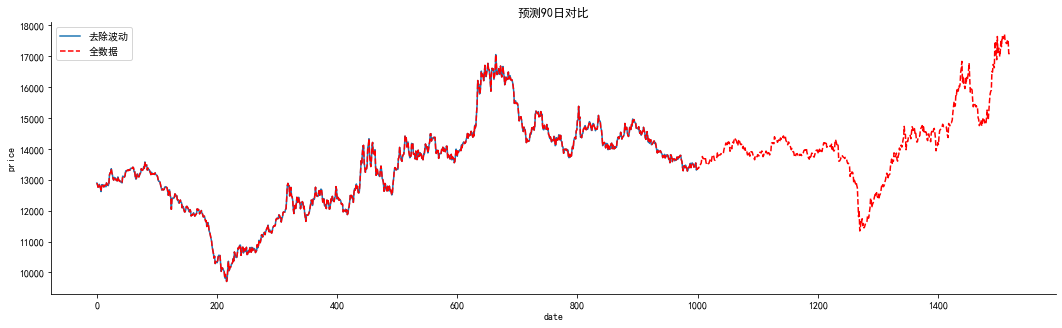

In [115]:
plt.figure(num=3, figsize=(18, 5))
plt.plot(list(train_data['close']),label='去除波动')
plt.plot(list(origin_data['close']),color='red',label='全数据',linestyle='--')
# 添加图例要在线上加label 然后配合legend
plt.legend(loc='upper left')
plt.title('预测90日对比')

plt.xlabel('date')
plt.ylabel('price')

# 让右边框和上边框消失
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# hour = ''.join(''.join(str(datetime.datetime.now())[:13].split(' ')).split('-'))
# plt.savefig('./预测160日数据（增量训练）'+hour+'.jpg')
plt.show()

In [116]:
features = ['ppi_yoy', 'ppi_mom', 'ppi_accu', 'nt_val', 'town_val','cnt_val', 'm0', 'm1', 'm2', 'gdp', 'pi', 'si', 'ti', 'settle', 'vol', 'amount', 'oi']
X = train_data[features][0:400]
y = train_data.close[0:400]
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=1, random_state=0)
model1 = RandomForestRegressor(random_state=1,max_features=5,n_estimators=200,max_depth=10)
model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=200,
                      random_state=1)

In [117]:
features = ['ppi_yoy', 'ppi_mom', 'ppi_accu', 'nt_val', 'town_val','cnt_val', 'm0', 'm1', 'm2', 'gdp', 'pi', 'si', 'ti', 'settle', 'vol', 'amount', 'oi']
X = train_data[features][0:600]
y = train_data.close[0:600]
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=1, random_state=0)
model2 = RandomForestRegressor(random_state=1,max_features=5,n_estimators=200,max_depth=10)
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=200,
                      random_state=1)

In [118]:
features = ['ppi_yoy', 'ppi_mom', 'ppi_accu', 'nt_val', 'town_val','cnt_val', 'm0', 'm1', 'm2', 'gdp', 'pi', 'si', 'ti', 'settle', 'vol', 'amount', 'oi']
X = train_data[features][:]
y = train_data.close[:]
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=1, random_state=0)
model3 = RandomForestRegressor(random_state=1,max_features=5,n_estimators=200,max_depth=10)
model3.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=200,
                      random_state=1)

In [119]:
features = ['ppi_yoy', 'ppi_mom', 'ppi_accu', 'nt_val', 'town_val','cnt_val', 'm0', 'm1', 'm2', 'gdp', 'pi', 'si', 'ti', 'settle', 'vol', 'amount', 'oi']
X = test_data[features]
y = test_data.close
X_train2, X_test2, y_train2, y_test2 =train_test_split(X,y,test_size=1, random_state=0)
y_train2 = y_train2.sort_index()
X_train2 = X_train2.sort_index()
preds1 = model1.predict(X_train2)
preds2 = model2.predict(X_train2)
preds3 = model3.predict(X_train2)
a1 = list(y_train2)

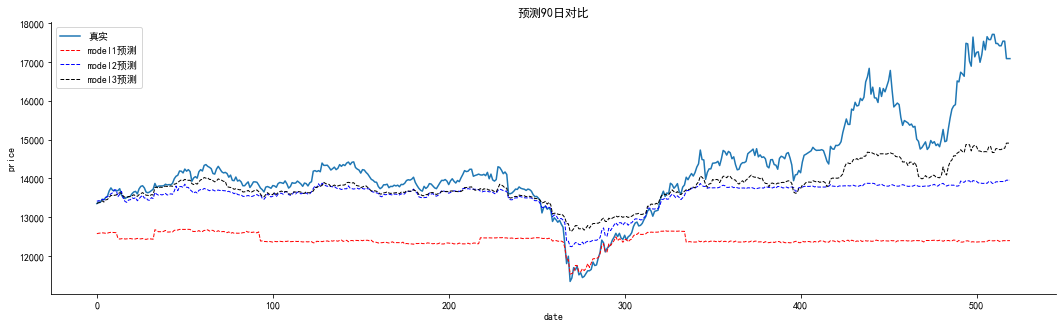

In [120]:
plt.figure(num=3, figsize=(18, 5))
plt.plot( a1,label='真实')
plt.plot( preds1, color='red', linewidth=1.0, linestyle='--',label='model1预测')
plt.plot( preds2, color='blue', linewidth=1.0, linestyle='--',label='model2预测')
plt.plot( preds3, color='black', linewidth=1.0, linestyle='--',label='model3预测')
# 添加图例要在线上加label 然后配合legend
plt.legend(loc='upper left')
plt.title('预测90日对比')

plt.xlabel('date')
plt.ylabel('price')

# 让右边框和上边框消失
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
hour = ''.join(''.join(str(datetime.datetime.now())[:13].split(' ')).split('-'))
plt.savefig('./预测160日数据（增量训练+去除波动）'+hour+'.jpg')
plt.show()

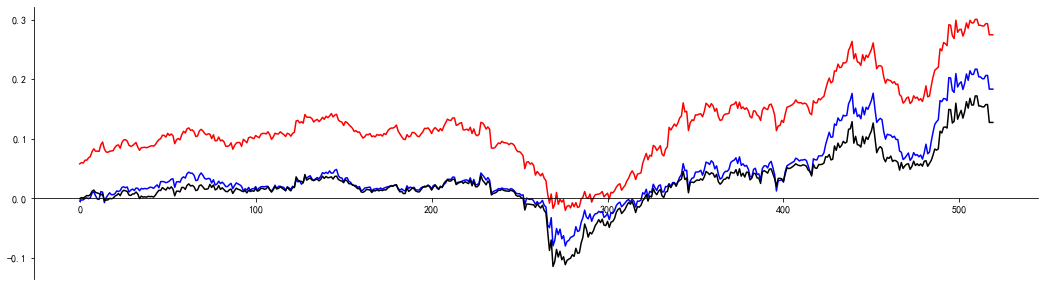

In [121]:
'''
求两列表差值
input:  a:list
        b:list
output: res:list
'''
def d_value(list1,list2):
    res = []
    n = len(list1)
    for i in range(0,n):
        res.append(list1[i] - list2[i])
    return res

def div_value(list1,list2):
    res = []
    n = len(list1)
    for i in range(0,n):
        res.append(list1[i]/list2[i])
    return res

error1 = d_value(a1,preds1)
error1 = div_value(error1,a1)
error2 = d_value(a1,preds2)
error2 = div_value(error2,a1)
error3 = d_value(a1,preds3)
error3 = div_value(error3,a1)


# new_ticks = np.linspace(-1500, 3000, 20)

plt.figure(num=1,figsize=(18,5))
plt.plot(error1,color='red')
plt.plot(error2,color='blue')
plt.plot(error3,color='black')
# plt.yticks(new_ticks)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
hour = ''.join(''.join(str(datetime.datetime.now())[:13].split(' ')).split('-'))
plt.savefig('./预测差值90天数据（增量训练+去除波动）'+hour+'.jpg')
plt.show()